# Project description & Problem Definition


We have some job data scraped from Linkedin. Here we explore the data and try to answer some questions.

In [246]:
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
df = pd.read_csv('../data/raw/job_postings.csv')

In [248]:
# df_comp = pd.read_csv('../data/raw/company_details/companies.csv')
# df_ind = pd.read_csv('../data/raw/company_details/company_industries.csv')
# df_emp = pd.read_csv('../data/raw/company_details/employee_counts.csv')

# Total features inspection and Initial Preprocessing

## Inital inspect


Drop columns with lots of missing values.

Can we add values if missing? 

In [249]:
# df.head()
df.columns
# Display the first few rows of the dataframe
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   max_salary                  11111 non-null  float64
 4   min_salary                  11111 non-null  float64
 5   pay_period                  13352 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   location                    33246 non-null  object 
 8   applies                     16238 non-null  float64
 9   remote_allowed              4802 non-null   float64
 10  views                       25886 non-null  float64
 11  formatted_experience_level  24065 non-null  object 
 12  skills_desc                 337 non-null    object 
 13  posting_domain              196

In [78]:
# Categorical  and Numerical columns
# df.info() #df.count()
object_columns = df.select_dtypes(include='object').columns
object_numerical = df.select_dtypes(include='float64').columns

In [91]:
df.nunique()
# df.isnull().sum()
# df.isna().sum()

job_id                        33246
company_id                    11325
title                         22404
max_salary                     2359
min_salary                     2152
pay_period                        5
formatted_work_type               7
location                       4621
applies                         328
remote_allowed                    1
views                           788
formatted_experience_level        7
skills_desc                     304
posting_domain                 2576
work_type                         7
job_classification               92
median_salary                  2855
dtype: int64

In [250]:
missing_percentage = df.isna().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
job_id                         0.000000
company_id                     1.967154
title                          0.000000
max_salary                    66.579438
min_salary                    66.579438
pay_period                    59.838778
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
remote_allowed                85.556157
views                         22.138002
formatted_experience_level    27.615352
skills_desc                   98.986344
posting_domain                40.780846
work_type                      0.000000
dtype: float64


In [251]:
# those with nas
# df[df.columns[df.isna().sum() > 0].tolist()].info() 
#No na values
df[df.columns[df.isna().sum() == 0].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               33246 non-null  int64 
 1   title                33246 non-null  object
 2   formatted_work_type  33246 non-null  object
 3   location             33246 non-null  object
 4   work_type            33246 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


## Location, work type and remote


### location


In [252]:
df["location"].value_counts()

United States        2341
New York, NY          818
Chicago, IL           534
Houston, TX           444
Dallas, TX            383
                     ... 
Corsicana, TX           1
Baldwinsville, NY       1
Lithonia, GA            1
Auburn, IN              1
Riverdale, UT           1
Name: location, Length: 4621, dtype: int64


### formatted_work_type


In [253]:
df["formatted_work_type"].value_counts()

Full-time     26900
Contract       3459
Part-time      2244
Temporary       260
Internship      228
Other           110
Volunteer        45
Name: formatted_work_type, dtype: int64

### remote_allowed


In [254]:
df["remote_allowed"].fillna(0, inplace=True)
# Verify the unique values
print(df["remote_allowed"].unique())

[0. 1.]


## Job title, description, level and skills


### Title

In [126]:
# Check for missing values
# df['title'].isnull().sum()# 0 missing values

unique_titles_count = df['title'].nunique()
print("\n Number of unique job titles:", unique_titles_count)

0                                Hearing Care Provider
1    Shipping & Receiving Associate 2nd shift (Beav...
2                                 Manager, Engineering
3                                                 Cook
4          Principal Cloud Security Architect (Remote)
5                        Territory Manager - New Haven
6                                  Auto Body Techncian
7        ACME D8- Asst Store Director (ASD) Sussex, NJ
8                                           Dishwasher
9    Instrumentation Quality Control Representative...
Name: title, dtype: object


### Experience_level


In [257]:
# df["formatted_experience_level"].isnull #27% missing values

In [258]:
df["formatted_experience_level"].unique() #['Entry level', 'nan', 'Mid-Senior level', 'Director',
    #    'Associate', 'Executive', 'Internship']
df['formatted_experience_level'].fillna('Unknown', inplace=True)

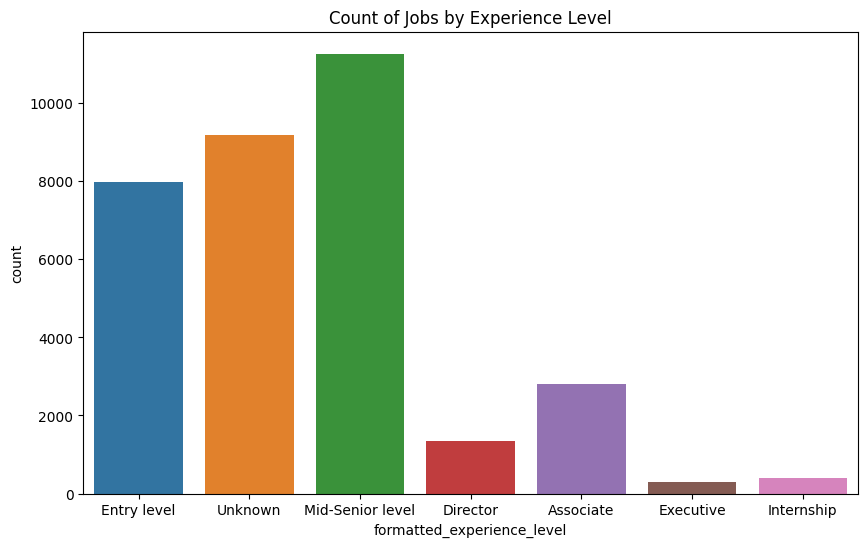

In [259]:
# distribition of formatted_experience_level as bar graph.

# Bar plot for formatted_experience_level
plt.figure(figsize=(10, 6))
sns.countplot(x='formatted_experience_level', data=df)
plt.title('Count of Jobs by Experience Level')
plt.show()

In [189]:
# Some jobs have an undetermined experience level. We can replace the missing values with "Unknown" to indicate this.
unknown_rows = df[df["formatted_experience_level"] == "Unknown"]
unknown_rows.shape
unknown_rows["title"].value_counts()


Call Center Support Rep                    38
Sales Associate                            36
Scoring Content Specialist                 36
Project Manager                            33
Staff Accountant                           33
                                           ..
Attorney Development Coordinator            1
OR / PACU And Pre-op : Registered Nurse     1
Human Resources Intern                      1
Cctv                                        1
Stylist/ Clorist                            1
Name: title, Length: 6416, dtype: int64


# formatted_work_type and work_type are the same


In [192]:
df["formatted_work_type"].value_counts()

Full-time     26900
Contract       3459
Part-time      2244
Temporary       260
Internship      228
Other           110
Volunteer        45
Name: formatted_work_type, dtype: int64

### skills_desc


In [ ]:
#More than 98% of the data is missing in the "skills_desc" column. We can drop this column.
df.drop("skills_desc",axis=1, inplace=True)

## Salary and pay period

In [195]:
## max_salary # 66% missing

## min_salary # 66% missing

df["max_salary"].isnull().sum()

no_salary = df[(df["max_salary"].isnull()) & (df["min_salary"].isnull())]   
no_salary.head()

# Which job posters do not provide sufficent details about the salary?
no_salary


# Which companies should recosider their job postings? ie those that are not effective at attaining applicants.

,job_id,company_id,title,max_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,formatted_experience_level,skills_desc,posting_domain,work_type
0,3757940104,553718.0,Hearing Care Provider,NaN,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,Entry level,NaN,careers-demant.icims.com,FULL_TIME
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,Unknown,NaN,www.click2apply.net,FULL_TIME
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,NaN,NaN,Unknown,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,FULL_TIME
3,3757938018,18213359.0,Cook,NaN,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,Entry level,NaN,jobs.apploi.com,FULL_TIME
5,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,Full-time,United States,NaN,1.0,16.0,Mid-Senior level,NaN,www.zoll.com,FULL_TIME


In [ ]:

# Add median salary column
df['median_salary'] = (df['max_salary'] + df['min_salary']) / 2
# df.head()

# Distribution of median_salary
plt.figure(figsize=(10, 6))
sns.histplot(df['median_salary'], bins=30, kde=True)
plt.title('Distribution of median_salary')
plt.show()


### pay_period





## Linkedin postings



### applies


In [ ]:

# df["applies"].value_counts()
df["applies"].isnull().sum()
df['applies'].fillna(0, inplace=True)


In [200]:
df['applies'].value_counts()

0.0      17008
1.0       3706
2.0       1954
3.0       1262
4.0        970
         ...  
325.0        1
361.0        1
362.0        1
465.0        1
669.0        1
Name: applies, Length: 329, dtype: int64

In [207]:
# We can add a new column to the DataFrame to indicate whether a job posting is effective or not.
# Create a new column 'effectiveness' based on your criteria
df['posting_effectiveness'] = df['applies'].apply(lambda x: 'Bad' if x == 0 else ('Okay' if 0 < x < 10 else ('Effective' if x < 100 else 'Too Many')))

# Display the updated DataFrame
# print(df)
df['posting_effectiveness']

0         Bad
1         Bad
2         Bad
3         Bad
4         Bad
         ... 
33241     Bad
33242    Okay
33243     Bad
33244     Bad
33245     Bad
Name: posting_effectiveness, Length: 33246, dtype: object


### views


In [232]:

# df['views'].fillna(0, inplace=True)
# df["views"].isnull().sum() #7360

# df['views'].value_counts()
df.sort_values(by='views', inplace=False)
df.tail()

,job_id,company_id,title,max_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,formatted_experience_level,skills_desc,posting_domain,work_type,posting_effectiveness
18944,3701315902,87217500.0,Executive Assistant,NaN,NaN,NaN,Full-time,United States,0.0,1.0,2570.0,Unknown,NaN,NaN,FULL_TIME,Bad
19084,3701314188,68764239.0,Vice President,NaN,NaN,NaN,Full-time,United States,253.0,1.0,2599.0,Unknown,NaN,NaN,FULL_TIME,Too Many
32737,3693042964,29091.0,President / CEO,NaN,NaN,NaN,Full-time,United States,149.0,1.0,3453.0,Mid-Senior level,NaN,brainworksinc.com,FULL_TIME,Too Many
31437,3693049413,18476.0,Junior Software Engineer,NaN,NaN,NaN,Full-time,United States,1615.0,1.0,3657.0,Entry level,NaN,NaN,FULL_TIME,Too Many
32521,3693044557,2503130.0,Customer Success Manager,146000.0,115000.0,YEARLY,Full-time,United States,1420.0,1.0,5656.0,Unknown,NaN,NaN,FULL_TIME,Too Many


In [242]:
#Say that postings outside of 100 views are outliers. How many are there?
df["views"].describe()

df[df["views"]<100].shape
#proposed outliers
df[df["views"]>100].shape


(3784, 16)

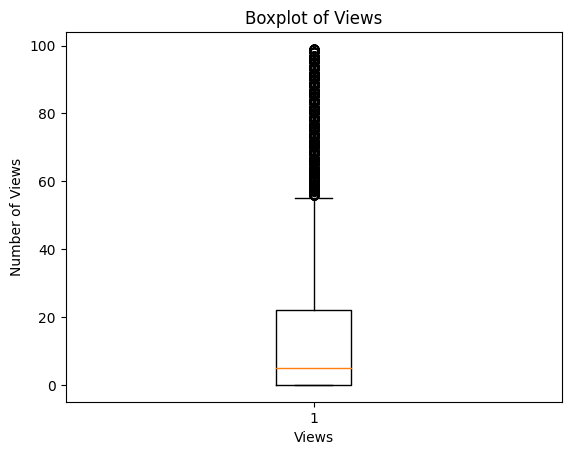

In [244]:

# Assuming df is your DataFrame
plt.boxplot(df[df["views"]<100]["views"])
plt.xlabel('Views')
plt.ylabel('Number of Views')
plt.title('Boxplot of Views')
plt.show()



(3784, 16)

In [ ]:

# Reasons for minimal view counts can be reduced time of post on site.
# can't assume posted at same time.
# Cannot assume poor job posting.


### posting_domain


In [ ]:
df["posting_domain"].value_counts()

# What domains post the most view/applications jobs?

## Job_id and comapny_id

In [ ]:
#Job_id

# data\raw\job_details\job_skills.csv # better than description

# job_id and company_id are unique identifiers for each job posting and company, respectively.

# Can ask which companies have multiple job postings.


In [ ]:
# Company_id

df_comp.head()

# Do all jobs have a company_id?

# Check for missing values
df['company_id'].isnull().sum()


# company_id
# Check for unique values
df['company_id'].nunique()
df['company_id'].value_counts()

# how popular is a given job classification in a given industry?
# Which industry pays the most for a given job classification?

#What type of job postings are there for each company?

# What industry is popular? view and apps.

# df_comp = pd.read_csv('../data/raw/company_details/companies.csv')
# df_ind = pd.read_csv('../data/raw/company_details/company_industries.csv')
# df_emp = pd.read_csv('../data/raw/company_details/employee_counts.csv')

# Feature Engineering:


In [ ]:
# for feature eng
## Add country col from location




## Job classification

In [ ]:
# The title is specific, want to distil the type of job that it is. 

In [69]:

# from wordcloud import WordCloud

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
# plt.figure(figsize=(12, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Job Titles')
# # plt.show()



In [ ]:
from collections import Counter
from wordcloud import STOPWORDS
import re

# Assuming df is your DataFrame
job_titles = df['title'].dropna()  # Drop any NaN values if present

# Combine all job titles into a single string
all_titles_text = ' '.join(job_titles)

# Remove common English stopwords from the text
stopwords = set(STOPWORDS)
all_titles_text = ' '.join([word for word in all_titles_text.split() if word.lower() not in stopwords])

# Remove symbols and keep only alphanumeric words
all_titles_text = re.sub(r'\W', ' ', all_titles_text)

# Tokenize the text into words
words = all_titles_text.split()

# Count the occurrences of each word
word_counter = Counter(words)

# Get the 100 most common words
most_common_words = word_counter.most_common(100)

# Display the result
print("100 Most Common Words in 'title' column:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Define the most common words
most_common_words_l=word_list = [word for word, _ in most_common_words]
# most_common_words_l

100 Most Common Words in 'title' column:
Manager: 5238
Engineer: 2871
Senior: 2283
Sales: 2112
Specialist: 1761
Associate: 1686
Assistant: 1583
Director: 1557
Analyst: 1536
Technician: 1280
Nurse: 1110
Project: 962
RN: 926
Business: 833
Lead: 813
Service: 804
Coordinator: 759
Time: 735
Representative: 728
Account: 728
Developer: 684
Operations: 675
Support: 673
Sr: 666
Registered: 663
Data: 660
Executive: 618
Supervisor: 568
Development: 567
Software: 541
Marketing: 540
II: 534
Remote: 522
Customer: 516
Program: 496
Operator: 495
Consultant: 486
Product: 476
Services: 468
Full: 465
Accountant: 461
Care: 454
Travel: 454
Part: 444
Medical: 435
Shift: 434
Retail: 420
Architect: 400
Engineering: 386
Financial: 384
Store: 381
Technical: 381
Management: 380
Quality: 370
Staff: 369
Health: 369
Intern: 360
Maintenance: 353
Security: 341
Designer: 334
Tech: 334
Clinical: 333
Systems: 328
Administrator: 314
Field: 312
Tax: 305
Center: 302
Team: 302
2: 302
Construction: 276
Production: 275
Design

In [21]:

# Create a new column for classification
df['job_classification'] = ''

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    title = row['title']
    classification = ''
    
    # Check if any of the most common words are present in the title
    for word in most_common_words_l:
        if word in title:
            classification = word
            break
    
    # Assign the classification to the corresponding row
    df.at[index, 'job_classification'] = classification


# Display the first few rows of the dataframe
df.head()

,job_id,company_id,title,max_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,formatted_experience_level,skills_desc,posting_domain,work_type,job_classification
0,3757940104,553718.0,Hearing Care Provider,NaN,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,Entry level,NaN,careers-demant.icims.com,FULL_TIME,Care
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,NaN,NaN,www.click2apply.net,FULL_TIME,Associate
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,NaN,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,FULL_TIME,Manager
3,3757938018,18213359.0,Cook,NaN,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,Entry level,NaN,jobs.apploi.com,FULL_TIME,
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,Mid-Senior level,NaN,careers.iherb.com,FULL_TIME,Remote


# Questions

## Which companies post the same job title multiple times? Why would they do this?

In [ ]:
# Top 10 most common job titles
most_common_titles = df['title'].value_counts().head(10)
print("Top 10 most common job titles:\n", most_common_titles)


Top 10 most common job titles:
 Sales Director [Owner/Operator]    120
Sales Manager                       99
Project Manager                     97
Customer Service Representative     85
Senior Accountant                   83
Retail Sales Associate              82
Sales Associate                     81
Staff Accountant                    78
Administrative Assistant            77
Executive Assistant                 72
Name: title, dtype: int64
[120, 99, 97, 85, 83, 82, 81, 78, 77, 72]


In [ ]:
top_titles_list = most_common_titles.index.tolist()

# Display the list of top job titles
print("List of Top 10 most common job titles:\n", top_titles_list)

List of Top 10 most common job titles:
 ['Sales Director [Owner/Operator]', 'Sales Manager', 'Project Manager', 'Customer Service Representative', 'Senior Accountant', 'Retail Sales Associate', 'Sales Associate', 'Staff Accountant', 'Administrative Assistant', 'Executive Assistant']



 Number of unique job titles: 22404


In [ ]:
#extract rows with title

# title = "Sales Manager"
title="Project Manager"
df_title = df[df["title"] == title]

In [ ]:
# Group by 'company_id'
grouped_df = df_title.groupby('company_id').size().reset_index(name='count')
sorted_grouped_df = grouped_df.sort_values(by='count', ascending=False)

# Display the grouped DataFrame
print(sorted_grouped_df)

    company_id  count
5      11056.0      4
2       4852.0      2
85  95073063.0      2
19     62227.0      2
32    294125.0      2
..         ...    ...
29    164860.0      1
28    163188.0      1
27    151137.0      1
26    134577.0      1
86  98506846.0      1

[87 rows x 2 columns]


In [ ]:
# Initialize an empty dictionary to store the results
companies_with_multiple_posts = {}

for title in top_titles_list:
    df_title = df[df["title"] == title]
    grouped_df = df_title.groupby('company_id').size().reset_index(name='count')
    sorted_grouped_df = grouped_df.sort_values(by='count', ascending=False)
    
    # Extract the company ids for which the count exceeds 5
    companies = sorted_grouped_df[sorted_grouped_df['count'] > 3]['company_id'].tolist()
    
    # Add the result to the dictionary
    companies_with_multiple_posts[title] = companies

# Now, companies_with_multiple_posts is a dictionary where the keys are job titles and the values are lists of company ids
print(companies_with_multiple_posts)

{'Sales Director [Owner/Operator]': [3570660.0], 'Sales Manager': [73013724.0], 'Project Manager': [11056.0], 'Customer Service Representative': [12446.0, 98061689.0, 11056.0, 2575734.0], 'Senior Accountant': [1681.0, 18860134.0, 248184.0], 'Retail Sales Associate': [1103.0, 28923.0, 5328.0, 8294.0], 'Sales Associate': [6176.0, 7795.0, 5061336.0, 1511.0, 30755.0], 'Staff Accountant': [], 'Administrative Assistant': [686294.0], 'Executive Assistant': [373568.0]}


In [ ]:
selected_company_id = 73013724.0

# Merge the two DataFrames based on 'company_id'
result_df = pd.merge(df, grouped_df[grouped_df["company_id"] == selected_company_id], on='company_id', how='inner')

# Display the resulting DataFrame
result_df.head()

,job_id,company_id,title,max_salary,min_salary,pay_period,formatted_work_type,location,applies,remote_allowed,views,formatted_experience_level,skills_desc,posting_domain,work_type,count
0,3757935001,73013724.0,Sales Manager,350000.0,125000.0,YEARLY,Full-time,"Coeur d'Alene, ID",NaN,1.0,NaN,Mid-Senior level,NaN,NaN,FULL_TIME,63
1,3757934264,73013724.0,Sales Manager,350000.0,125000.0,YEARLY,Full-time,"Richmond, VA",NaN,1.0,NaN,Mid-Senior level,NaN,NaN,FULL_TIME,63
2,3757934178,73013724.0,Sales Manager,350000.0,125000.0,YEARLY,Full-time,"Rapid City, SD",NaN,1.0,NaN,Mid-Senior level,NaN,NaN,FULL_TIME,63
3,3757934003,73013724.0,Sales Manager,350000.0,125000.0,YEARLY,Full-time,"Yuma, AZ",NaN,1.0,NaN,Mid-Senior level,NaN,NaN,FULL_TIME,63
4,3757933435,73013724.0,Sales Manager,350000.0,125000.0,YEARLY,Full-time,"Sheboygan, WI",NaN,1.0,NaN,Mid-Senior level,NaN,NaN,FULL_TIME,63


In [ ]:
# result_df.drop("job_id", axis=1, inplace=True)

# # result_df.shape # 63
# result_df.drop_duplicates(inplace=True)
# result_df.shape 

(63, 14)

In [ ]:

# is there any duplicate rows after removing identifiers, but with different locations, posted by the same person or different companies?
#Which companies are looking for the same title/job_classification (what constitues the same job)

## Analysis with job classifications

In [ ]:

#Distrubition of job_classification wrt views.

#number of applications for each job classification compared to the number of views
# or ratio of applications to views fo each class

#Are there certain job_classification associated with median salaries?

# plt.figure(figsize=(12, 8))
# # sns.boxplot(x='job_classification', y='median_salary', data=df)
# plt.xticks(rotation=90)
# plt.title('Boxplot of median Salary by Job Title')
# plt.show()

#What is considered entry level wage for each job classification?


## Analysis with salary


In [ ]:

# Does the highest paying jobs attact the most view and or apps? (scatter pay to views and apps).

# What is the distrubition of applications/views against pay?

# is the pay_period (hrly) indictive of lower paying jobs?
## Boxplot for salary information
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='pay_period', y='max_salary', data=df)
# plt.title('Boxplot of Max Salary by Pay Period')
# plt.show()


In [ ]:
#Prediction
# Want to predict median salary based on job classification, location_country, formatted_work_type, and formatted_experience_level,pay_period

# Want a  visual of jobs in this category and their median salary.
